In [1]:
import beepy

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Using pieces of json_convert.py

In [4]:
!ls data

delme.json               places_revs_count.json   reviews_sub.json
gPlusPlaceId_filter.json places_sub.json          users.clean.json
places.clean.json        places_sub_gps.json      users.json
places.json              reviews.clean.json       users_sub.json
places_gps.json          reviews.json


In [5]:
%%time
df=pd.read_json('data/reviews.json')  # Wall time: 2min 12s
df.info()
beepy.beep(sound=1) # 1 : 'coin'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11453845 entries, 0 to 11453844
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   rating          int64  
 1   reviewerName    object 
 2   reviewText      object 
 3   categories      object 
 4   gPlusPlaceId    float64
 5   unixReviewTime  float64
 6   reviewTime      object 
 7   gPlusUserId     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 786.5+ MB
CPU times: user 1min 36s, sys: 23.5 s, total: 2min
Wall time: 2min 7s


In [6]:
df.head()

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId
0,3,an lam,Chất lượng tạm ổn,[Giải Trí - Café],1.081033e+20,1.372687e+09,"Jul 1, 2013",1.000000e+20
1,5,HALİL TURGUT,Wc si temiz duzenli..,[Turkish Cuisine],1.021941e+20,1.342871e+09,"Jul 21, 2012",1.000000e+20
2,5,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"[Fishing, Pond Fish Supplier, Seafood Market]",1.014099e+20,1.390654e+09,"Jan 25, 2014",1.000000e+20
3,5,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,[Museum],1.014772e+20,1.389188e+09,"Jan 8, 2014",1.000000e+20
4,4,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,[Police],1.069942e+20,1.390486e+09,"Jan 23, 2014",1.000000e+20


In [41]:
import beepy

In [42]:
%%time
df_reviews = df.copy(deep=True)
beepy.beep(sound=4) # 4 : 'ping'

CPU times: user 1.35 s, sys: 9.64 s, total: 11 s
Wall time: 26.8 s


In [44]:
df_reviews.head()

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId
0,3,an lam,Chất lượng tạm ổn,[Giải Trí - Café],1.081033e+20,1.372687e+09,"Jul 1, 2013",1.000000e+20
1,5,HALİL TURGUT,Wc si temiz duzenli..,[Turkish Cuisine],1.021941e+20,1.342871e+09,"Jul 21, 2012",1.000000e+20
2,5,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"[Fishing, Pond Fish Supplier, Seafood Market]",1.014099e+20,1.390654e+09,"Jan 25, 2014",1.000000e+20
3,5,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,[Museum],1.014772e+20,1.389188e+09,"Jan 8, 2014",1.000000e+20
4,4,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,[Police],1.069942e+20,1.390486e+09,"Jan 23, 2014",1.000000e+20


In [9]:
len('118197036100848205824')

21

In [6]:
df
df.shape  # 11453845, 8

(11453845, 8)

In [54]:
type(tmp)

pandas.core.series.Series

In [36]:
whos

Variable            Type         Data/Info
------------------------------------------
beepy               module       <module 'beepy' from '/Us<...>kages/beepy/__init__.py'>
df                  DataFrame              rating      rev<...>1453845 rows x 8 columns]
np                  module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd                  module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
places_revs_count   DataFrame                  gPlusPlaceI<...>3116785 rows x 1 columns]
tmp                 Series       0           1.081033e+20\<...> 11453845, dtype: float64
tmp_set             set          {1.1383204840649082e+20, <...>, 1.1532089331672759e+20}


In [45]:
# August 6, 2021 work on reviews db
# HAVING:
# df_reviews=pd.read_json('data/reviews.json')  # Wall time: 2min 12s

# Block to:
# 1) introduce gPlusPlaceId_index to reviews
# 2) drop duplicate indices
# 3) save, read, check for gps box filtering

# 1) introduce gPlusPlaceId_index to reviews
#  given df, and unprocessed gPlusPlaceId in form 1.081033e+20, or df.loc[0] 108103314380004196352.0
# following process for places, here we go

# !!!!!!!!!!!!!! int() rounds to 0 => duplicates, round() to the nearest int
# df_places_gps['gPlusPlaceId_index'] = df_places_gps['gPlusPlaceId'].transform(lambda x: int(x/1e11))
# df_places_gps['gPlusPlaceId_index'] = df_places_gps['gPlusPlaceId'].transform(lambda x: round(x/1e11))
# df_places_gps.head()
df_reviews['gPlusPlaceId_index'] = df_reviews['gPlusPlaceId'].transform(lambda x: round(x/1e11))
df_reviews.head()


# 2) drop duplicate indices
#  2.1) read indices to drop from places:
gPlusPlaceId_index_2_drop = pd.read_json('data/gPlusPlaceId_4_duplicates.json')
dir(gPlusPlaceId_index_2_drop[0]) #= gPlusPlaceId_index_2_drop.to_series().tolist() # pandas.core.frame.DataFrame
gPlusPlaceId_index_2_drop = gPlusPlaceId_index_2_drop[0].to_list() # pandas.core.series.Series
len(gPlusPlaceId_index_2_drop) # list len(25278)
filter_2_drop = df_reviews['gPlusPlaceId_index'].isin(gPlusPlaceId_index_2_drop)
filter_2_drop.sum()  #len(185952) reviews
# expected number of records after filtering 11_267_893 1.62% drop
filter_2_drop.shape  # (11453845,) 185952 False = KEEP, not in the list to drop. Need to use ~filter_2_drop
#  And now drop duplicates
df_reviews = df_reviews[~filter_2_drop] # re-assign only not to be dropped rows
df_reviews.shape  # expected drop from 11453845 entries to 11_267_893 1.62% drop

%%time
# 3) save, read, check for gps box filtering
df_reviews.to_json('data/reviews_gPlusPlaceId_index_no_duplicates.json')  Wall time: 44 s
beepy.beep(sound=4) # 4 : 'ping' 
%%time
df_reviews = pd.read_json('data/reviews_gPlusPlaceId_index_no_duplicates.json')
beepy.beep(sound=4) # 4 : 'ping' 

# Now, gps box filter for 98012 - THE MOMENT OF TRUTH !!!
# 4) read indices to filter per gps_box
# gPlusPlaceId_index_2_drop = pd.read_json('data/gPlusPlaceId_4_duplicates.json')
gPlusPlaceId_index_gps_box = pd.read_json('data/gPlusPlaceId_4_gps_box.json')

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index
0,3,an lam,Chất lượng tạm ổn,[Giải Trí - Café],1.081033e+20,1.372687e+09,"Jul 1, 2013",1.000000e+20,1081033144
1,5,HALİL TURGUT,Wc si temiz duzenli..,[Turkish Cuisine],1.021941e+20,1.342871e+09,"Jul 21, 2012",1.000000e+20,1021941282
2,5,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"[Fishing, Pond Fish Supplier, Seafood Market]",1.014099e+20,1.390654e+09,"Jan 25, 2014",1.000000e+20,1014098588
3,5,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,[Museum],1.014772e+20,1.389188e+09,"Jan 8, 2014",1.000000e+20,1014771775
4,4,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,[Police],1.069942e+20,1.390486e+09,"Jan 23, 2014",1.000000e+20,1069941706


In [78]:
!ls data

delme.json                     places_sub.json
dir.txt                        places_sub_gps.json
gPlusPlaceId_4_duplicates.json reviews.clean.json
gPlusPlaceId_filter.json       reviews.json
places.clean.json              reviews_sub.json
places.json                    users.clean.json
places_gps.json                users.json
places_gps_no_dup_indexed.json users_sub.json
places_revs_count.json


In [93]:
%%time
# 4)  check for gps box filtering
gPlusPlaceId_index_gps_box = pd.read_json('data/gPlusPlaceId_4_gps_box.json', orient='index')


# Now, gps box filter for 98012 - THE MOMENT OF TRUTH !!!

CPU times: user 17.1 ms, sys: 7.67 ms, total: 24.8 ms
Wall time: 32.6 ms


In [94]:
gPlusPlaceId_index_gps_box

,0
2007-02-10 14:28:17,1171117697
2004-02-26 09:23:23,1077787403
2002-07-15 04:57:31,1026709051
2006-10-02 16:41:47,1159807307
2003-10-15 23:21:29,1066260089
...,...
2006-04-19 10:18:22,1145441902
2002-02-15 09:59:07,1013767147
2007-01-12 23:53:09,1168645989
2002-04-09 15:20:21,1018365621


In [95]:
gPlusPlaceId_index_gps_box = gPlusPlaceId_index_gps_box[0].to_list() # pandas.core.series.Series
len(gPlusPlaceId_index_gps_box) # list len(23780)

23780

In [96]:
filter_2_keep = df_reviews['gPlusPlaceId_index'].isin(gPlusPlaceId_index_gps_box)
filter_2_keep.sum()  #len(112747) reviews

112747

In [99]:
112747/23780

4.74125315391085

In [97]:
# expected number of records after filtering 11_267_893 112747 = 1.00 % subsample
# 23780 businesses @ 50 miles box around zip=98012 with 112747 reviews ~ 4.74 reviews per business
filter_2_keep.shape  # (11267893,) 112747 True = KEEP, in the list 
#  And now drop duplicates

(11267893,)

In [100]:
df_reviews = df_reviews[filter_2_keep] # re-assign only to the rows with reviews for needed businesses
df_reviews.shape  # expected drop from 11267893 entries to 112747 1.00% subsample

(112747, 9)

In [ ]:
gPlusPlaceId_index_gps_box = gPlusPlaceId_index_gps_box[0].to_list() # pandas.core.series.Series
len(gPlusPlaceId_index_gps_box) # list len(23780)
filter_2_keep = df_reviews['gPlusPlaceId_index'].isin(gPlusPlaceId_index_gps_box)
filter_2_keep.sum()  #len(185952) reviews
# expected number of records after filtering 11_267_893 1.62% drop
filter_2_keep.shape  # (11453845,) 185952 False = KEEP, not in the list to drop. Need to use ~filter_2_drop
#  And now drop duplicates
df_reviews = df_reviews[~filter_2_drop] # re-assign only not to be dropped rows
df_reviews.shape  # expected drop from 11453845 entries to 11_267_893 1.62% drop


In [103]:
df_reviews.to_json('data/reviews_gps_box.json')

In [102]:
!ls data

delme.json
dir.txt
gPlusPlaceId_4_duplicates.json
gPlusPlaceId_4_gps_box.json
gPlusPlaceId_filter.json
places.clean.json
places.json
places_gps.json
places_gps_box.json
places_gps_no_dup_indexed.json
places_revs_count.json
places_sub.json
places_sub_gps.json
reviews.clean.json
reviews.json
reviews_gPlusPlaceId_index_no_duplicates.json
reviews_sub.json
users.clean.json
users.json
users_sub.json


In [83]:
%%time
df_reviews = pd.read_json('data/reviews_gPlusPlaceId_index_no_duplicates.json')
beepy.beep(sound=4) # 4 : 'ping' 

CPU times: user 1min 44s, sys: 41.5 s, total: 2min 26s
Wall time: 2min 46s


In [85]:
df_reviews.shape # (11267893, 9)

(11267893, 9)

In [72]:
# expected number of records after filtering 11_267_893 1.62% drop
filter_2_drop.shape  # (11453845,) 185952 False = KEEP, not in the list to drop. Need to use ~filter_2_drop

(11453845,)

In [71]:
backup = df_reviews.copy(deep=True)

In [77]:
df_reviews = df_reviews[~filter_2_drop] # re-assign only not to be dropped rows
df_reviews.shape  # expected drop from 11453845 entries to 11_267_893 1.62% drop

(11267893, 9)

In [10]:

tmp = df['gPlusUserId']
tmp.shape # gPlusPlaceId = (11453845,) gPlusUserId = (11453845,)


(11453845,)

In [11]:
tmp_set = set(tmp.unique())
len(tmp_set)  # gPlusPlaceId 3116785 of 11453845  27.21% are rated; gPlusUserId unique reviewers 5054567

5054567

In [12]:
# tmp_set

In [13]:
# dir(users_revs_count)

In [14]:
tmp = df['gPlusPlaceId']
print(f'tmp.shape: {tmp.shape}') # gPlusPlaceId = (11453845,) gPlusUserId = (11453845,)

tmp_set = set(tmp.unique())
print(f'Total unique places with reviews: {len(tmp_set)}')  # gPlusPlaceId 3116785 of 11453845  27.21% are rated; gPlusUserId unique reviewers 5054567

tmp.shape: (11453845,)
Total unique places with reviews: 3116785


In [19]:
%%time
# users_revs_count = tmp.value_counts()
# users_revs_count  

places_revs_count = tmp.value_counts().to_frame()  # if no () present, creates a method
places_revs_count  # 1662 reviews place id: 

CPU times: user 720 ms, sys: 39.4 ms, total: 759 ms
Wall time: 763 ms


,gPlusPlaceId
1.181970e+20,1662
1.137090e+20,982
1.078367e+20,790
1.142999e+20,663
1.052215e+20,653
...,...
1.094026e+20,1
1.109621e+20,1
1.116628e+20,1
1.111517e+20,1


In [32]:
# largest number of ratings gPlusPlaceId = 1.181970361008482e+20
places_revs_count.loc[places_revs_count['gPlusPlaceId'] == 790].index

Float64Index([1.0783674901170669e+20], dtype='float64')

In [35]:
#  Eiffer Tower query 1662 reviews
# df.loc[df['gPlusPlaceId']==1.181970361008482e+20, :].iloc[41:50] #.loc[276036]['reviewText']
# Kaaba query 982 reviews
df.loc[df['gPlusPlaceId']==104991888599999987712.0, :].iloc[41:50] #.loc[276036]['reviewText']

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId


In [34]:
df.loc[602954]

rating                                                            3
reviewerName                                            Daniel Sese
reviewText        Es un lugar obligatorio para todos los visitan...
categories                                  [Stadium, Soccer Field]
gPlusPlaceId                                107836749011706691584.0
unixReviewTime                                         1378648351.0
reviewTime                                              Sep 8, 2013
gPlusUserId                                 100957782316342951936.0
Name: 602954, dtype: object

In [90]:
z = users_revs_count.to_frame()
type(z)
z['gPlusUserId'].values.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [97]:
z['gPlusUserId'].values

array([3221, 2635, 2562, ...,    1,    1,    1])

In [108]:
z.max()  # max() gPlusUserId    3221 gPlusUserId    1

gPlusUserId    3221
dtype: int64

In [110]:
z[0]

KeyError: 0

In [102]:
z['gPlusUserId'][z['gPlusUserId']>1]

1.006890e+20    3221
1.044172e+20    2635
1.066545e+20    2562
1.034360e+20    1625
1.119374e+20    1604
                ... 
1.039687e+20       2
1.004612e+20       2
1.039691e+20       2
1.044449e+20       2
1.043191e+20       2
Name: gPlusUserId, Length: 1531281, dtype: int64

In [94]:
import matplotlib.pyplot as plt

(array([3523286.,  712457.,  282212.,  146074.,       0.,   92605.,
          59803.,   41601.,   31067.,   23886.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

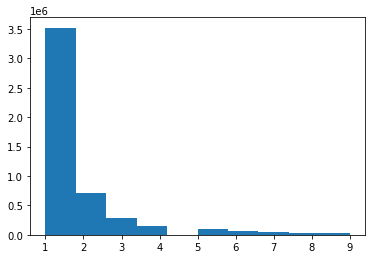

In [107]:
plt.hist(z['gPlusUserId'][z['gPlusUserId']<10], bins=10)

In [63]:
type(places_revs_count)

pandas.core.series.Series

In [64]:
places_revs_count.to_json('data/places_revs_count.json')

In [23]:
type(tmp)  # pandas.core.series.Series

pandas.core.series.Series

In [27]:
tmp.describe  # describe() => stats

<bound method NDFrame.describe of 0           1.081033e+20
1           1.021941e+20
2           1.014099e+20
3           1.014772e+20
4           1.069942e+20
                ...     
11453840    1.103024e+20
11453841    1.108115e+20
11453842    1.148005e+20
11453843    1.069190e+20
11453844    1.139461e+20
Name: gPlusPlaceId, Length: 11453845, dtype: float64>

In [33]:
# tmp[tmp==1.081033143800042e+20]
tmp[tmp.isin([1.081033143800042e+20, 104699454385822121984.0])]

0           1.081033e+20
1045535     1.081033e+20
4736034     1.081033e+20
4908948     1.046995e+20
5802541     1.046995e+20
8645185     1.046995e+20
10759216    1.046995e+20
Name: gPlusPlaceId, dtype: float64

In [36]:
gPlusPlaceId_filter=pd.read_json('data/gPlusPlaceId_filter.json')

In [43]:
gPlusPlaceId_filter   # 23958

,gPlusPlaceId
100001,1.083788e+20
1000173,1.006965e+20
100029,1.154916e+20
1000363,1.142189e+20
1000607,1.096848e+20
...,...
999610,1.066999e+20
999655,1.030973e+20
99971,1.015072e+20
999804,1.113550e+20


In [44]:
gps_filter_list = gPlusPlaceId_filter['gPlusPlaceId'].to_list()
type(gps_filter_list)

list

In [48]:
gps_filter_list

[1.083788035e+20,
 1.0069647129999999e+20,
 1.154916021e+20,
 1.1421892040000001e+20,
 1.0968482829999999e+20,
 1.0080166800000002e+20,
 1.1671256190000002e+20,
 1.092820277e+20,
 1.114975692e+20,
 1.01969087e+20,
 1.084170551e+20,
 1.043224385e+20,
 1.1130349049999999e+20,
 1.09901333e+20,
 1.118638374e+20,
 1.033911069e+20,
 1.165147816e+20,
 1.0136495080000001e+20,
 1.064232142e+20,
 1.090808858e+20,
 1.099019353e+20,
 1.056825949e+20,
 1.1097895929999999e+20,
 1.127947951e+20,
 1.0495126370000001e+20,
 1.01623424e+20,
 1.143647445e+20,
 1.0119331090000001e+20,
 1.0605728050000001e+20,
 1.182594192e+20,
 1.003803776e+20,
 1.019400066e+20,
 1.045993335e+20,
 1.0108113480000001e+20,
 1.170268123e+20,
 1.096755957e+20,
 1.184426765e+20,
 1.146706096e+20,
 1.108902481e+20,
 1.146721742e+20,
 1.1221755899999999e+20,
 1.01169032e+20,
 1.1403606280000001e+20,
 1.1600515319999999e+20,
 1.03061343e+20,
 1.113936646e+20,
 1.0116953529999999e+20,
 1.043681098e+20,
 1.146635527e+20,
 1.00973507

In [52]:
# tmp[tmp==1.081033143800042e+20] # There are results
tmp[tmp==1.0136495080000001e+20]

Series([], Name: gPlusPlaceId, dtype: float64)

In [47]:
# gps_filter = tmp[tmp.isin(gps_filter_list)]
tmp[tmp.isin(gps_filter_list)]

Series([], Name: gPlusPlaceId, dtype: float64)

In [46]:
gps_filter.shape

(0,)

In [34]:
!ls data

gPlusPlaceId_filter.json places_sub.json          reviews_sub.json
places.clean.json        places_sub_gps.json      users.clean.json
places.json              reviews.clean.json       users.json
places_gps.json          reviews.json             users_sub.json


In [29]:
# tmp[0] # 1.081033143800042e+20

1.081033143800042e+20

In [28]:
dir(tmp)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__r

In [19]:
filter = tmp = 104699454385822121984.0
filter

1.0469945438582212e+20

In [16]:
print (tmp[gPlusPlaceId][tmp[gPlusPlaceId] == 104699454385822121984.0])

NameError: name 'gPlusPlaceId' is not defined

In [13]:
tmp['gPlusPlaceId'].isin([104699454385822121984.0])

KeyError: 'gPlusPlaceId'

In [ ]:
len('104699454385822121984')

In [ ]:
%%time
df_places = pd.DataFrame(open('data/places.clean.json')) # Wall time: 1.54 Memory: 1.5GB

In [ ]:
df_places[0][0]
# "{'name': u'Diamond Valley Lake Marina', 
# 'price': None, 
# 'address': [u'2615 Angler Ave', u'Hemet, CA 92545'], 
# 'hours': [[u'Monday', [[u'6:30 am--4:15 pm']]], [u'Tuesday', [[u'6:30 am--4:15 pm']]], [u'Wednesday', [[u'6:30 am--4:15 pm']], 1], [u'Thursday', [[u'6:30 am--4:15 pm']]], [u'Friday', [[u'6:30 am--4:15 pm']]], [u'Saturday', [[u'6:30 am--4:15 pm']]], [u'Sunday', [[u'6:30 am--4:15 pm']]]], 
# 'phone': u'(951) 926-7201', 'closed': False, 
# 'gPlusPlaceId': '104699454385822125632', 'gps': [33.703804, -117.003209]}\n"

In [ ]:
%%time
df_places = df_places[0].apply(lambda x: pd.Series(eval(x))) # , axis=1, raw=True, result_type=object
df_places.head()
# STEP 2 df_places
# explode single column of dictionaries into proper columns



In [ ]:
df_places.info()

In [ ]:
import sys
sys.maxsize

In [ ]:
len('9223372036854775807')  # 19, len('114679857037403811721') = 21

In [ ]:
%%time
df_places['gPlusPlaceId'] = df_places['gPlusPlaceId'].astype(str)
df_places.info()

In [ ]:
df_places.iloc[3114352]

In [ ]:
!ls data

In [ ]:
%%time
df_reviews = pd.DataFrame(open('data/reviews.clean.json')) # Wall time: 1.54 Memory: 1.5GB

In [ ]:
df_reviews.head()

In [ ]:
%%time
df_reviews = df_reviews[0].apply(lambda x: pd.Series(eval(x)))
df_reviews.head()

In [ ]:
whos